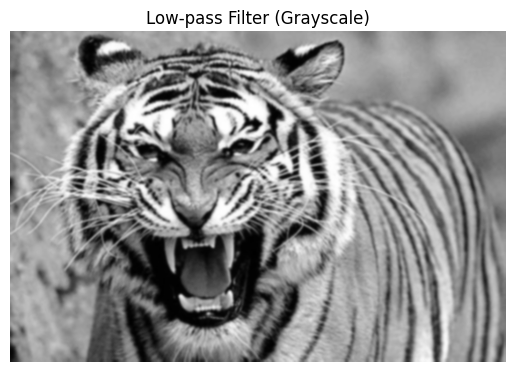

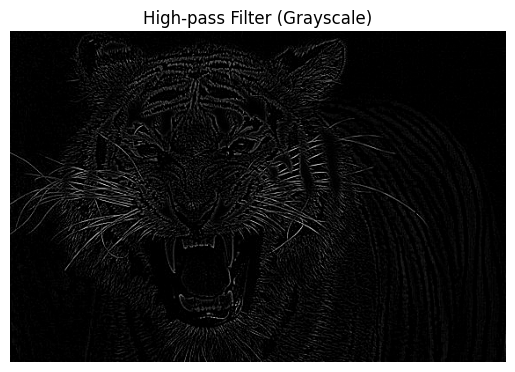

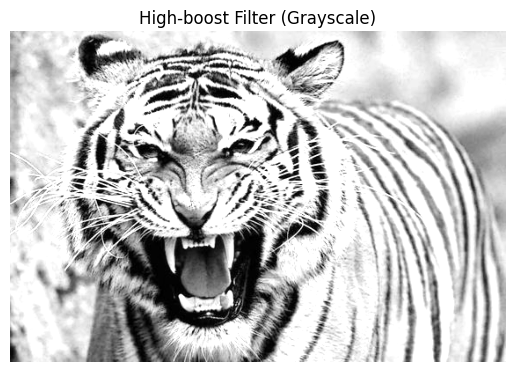

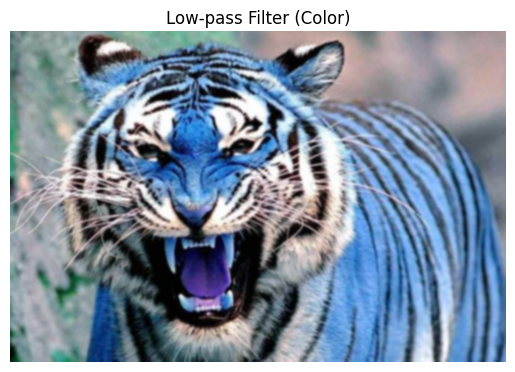

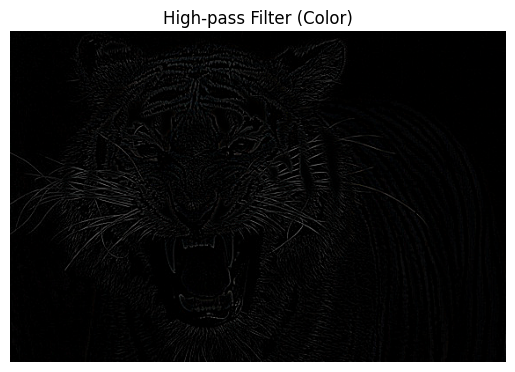

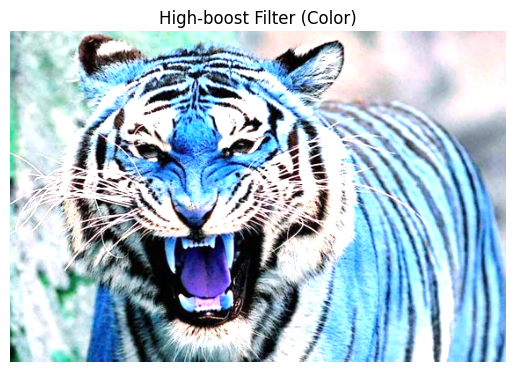

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def display_image(image, title):
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Membaca citra berwarna dan citra grayscale
image_color = cv2.imread("harimau.jpg")
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Fungsi untuk membuat filter low-pass (Gaussian blur)
def low_pass_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Fungsi untuk membuat filter high-pass
def high_pass_filter(image):
    # Membuat filter high-pass dengan mengurangi low-pass dari gambar asli
    low_pass = low_pass_filter(image)
    return cv2.subtract(image, low_pass)

# Fungsi untuk membuat filter high-boost
def high_boost_filter(image, boost_factor=1.5):
    high_pass = high_pass_filter(image)
    return cv2.addWeighted(image, boost_factor, high_pass, 1 - boost_factor, 0)

# Penerapan pada citra grayscale
low_pass_gray = low_pass_filter(image_gray)
high_pass_gray = high_pass_filter(image_gray)
high_boost_gray = high_boost_filter(image_gray)

# Penerapan pada citra berwarna
# Menggunakan filter per saluran R, G, dan B
def apply_color_filter(image, filter_func):
    channels = cv2.split(image)
    filtered_channels = [filter_func(channel) for channel in channels]
    return cv2.merge(filtered_channels)

low_pass_color = apply_color_filter(image_color, low_pass_filter)
high_pass_color = apply_color_filter(image_color, high_pass_filter)
high_boost_color = apply_color_filter(image_color, high_boost_filter)

# Menampilkan gambar hasil filter
display_image(low_pass_gray, 'Low-pass Filter (Grayscale)')
display_image(high_pass_gray, 'High-pass Filter (Grayscale)')
display_image(high_boost_gray, 'High-boost Filter (Grayscale)')

display_image(low_pass_color, 'Low-pass Filter (Color)')
display_image(high_pass_color, 'High-pass Filter (Color)')
display_image(high_boost_color, 'High-boost Filter (Color)')
